In [96]:
import pandas as pd
import numpy as np
import seaborn as sns

In [97]:
classes = ['OTHER', 'SWEEPING', 'VACUUMING', 'DUSTING', 'RUBBING', 'DOWNSTAIRS', 'WALKING', 'WALKING_FAST', 'UPSTAIRS_FAST', 'UPSTAIRS']

In [98]:
XY_all = pd.DataFrame()
for i in range(1, 10):
    # load data
    X = pd.read_csv('data/ankle/X_0' + str(i) + '.csv').join(pd.read_csv('data/hip/X_0' + str(i) + '.csv'), rsuffix='_hip')
    Y = pd.read_csv('data/ankle/Y_0' + str(i) + '.csv')
    XY_i = X.merge(Y, left_index=True, right_index=True)
    XY_i['Timestamp'] = pd.to_datetime(XY_i['Timestamp'])
    XY_i.set_index('Timestamp', inplace=True)
    
    # preprocess data
    XY_i = XY_i.drop(columns = ['Temperature', 'Magnetometer X', 'Magnetometer Y', 'Magnetometer Z', 'Timestamp_hip', 'Temperature_hip', 'Magnetometer X_hip', 'Magnetometer Y_hip', 'Magnetometer Z_hip'])
    XY_i_processed = XY_i.drop(columns = ['label']).rolling('10s').agg([np.mean, np.var, np.amin, np.amax])
    XY_i_processed = XY_i_processed.join(XY_i['label'])
    XY_i_processed = XY_i_processed.dropna()
    XY_all = pd.concat([XY_i_processed.iloc[::100, :], XY_all])

C:\Users\Andreas\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\reshape\merge.py:617: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [99]:
XY_all

,"(Accelerometer X, mean)","(Accelerometer X, var)","(Accelerometer X, amin)","(Accelerometer X, amax)","(Accelerometer Y, mean)","(Accelerometer Y, var)","(Accelerometer Y, amin)","(Accelerometer Y, amax)","(Accelerometer Z, mean)","(Accelerometer Z, var)",...,"(Gyroscope X_hip, amax)","(Gyroscope Y_hip, mean)","(Gyroscope Y_hip, var)","(Gyroscope Y_hip, amin)","(Gyroscope Y_hip, amax)","(Gyroscope Z_hip, mean)","(Gyroscope Z_hip, var)","(Gyroscope Z_hip, amin)","(Gyroscope Z_hip, amax)",label
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-07-31 16:18:00.010,0.592774,0.000004,0.591309,0.594238,-0.828125,0.000000,-0.828125,-0.828125,-0.102051,0.000008,...,3.051758,-6.805421,0.016764,-6.896973,-6.713868,-0.396728,0.091270,-0.610352,-0.183105,0
2020-07-31 16:18:01.010,0.592089,0.000011,0.584961,0.602539,-0.825023,0.000067,-0.838379,-0.804199,-0.101333,0.000060,...,4.028321,-0.144809,5.244761,-6.896973,4.699707,0.387154,1.718834,-2.624512,2.380371,0
2020-07-31 16:18:02.010,0.592582,0.000007,0.584961,0.602539,-0.824586,0.000042,-0.838379,-0.804199,-0.104105,0.000045,...,4.028321,-0.208175,2.867849,-6.896973,4.699707,0.294909,0.923212,-2.624512,2.380371,0
2020-07-31 16:18:03.010,0.592866,0.000005,0.584961,0.602539,-0.824098,0.000030,-0.838379,-0.804199,-0.105409,0.000035,...,4.028321,-0.247902,1.985603,-6.896973,4.699707,0.271479,0.636841,-2.624512,2.380371,0
2020-07-31 16:18:04.010,0.593015,0.000005,0.584961,0.602539,-0.823785,0.000024,-0.838379,-0.804199,-0.106241,0.000030,...,4.028321,-0.227380,1.518085,-6.896973,4.699707,0.265134,0.482208,-2.624512,2.380371,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-30 12:11:45.010,0.091274,0.728640,-5.961426,10.869629,-1.059004,0.585608,-9.498047,4.026367,0.105965,0.418724,...,81.298833,-0.168481,594.922029,-100.036627,77.758794,-0.218163,241.220519,-61.767582,44.921878,17
2020-07-30 12:11:46.010,0.094897,0.778978,-5.961426,10.869629,-1.046260,0.588652,-9.498047,4.026367,0.099129,0.391717,...,68.359379,0.026099,619.430672,-100.036627,77.758794,-0.687279,232.213385,-61.767582,40.466311,17
2020-07-30 12:11:47.010,0.107244,0.899352,-5.961426,10.869629,-1.037762,0.687963,-9.498047,4.026367,0.092429,0.464943,...,68.359379,-0.766218,607.590656,-89.965826,77.758794,-0.986422,227.804137,-61.767582,40.466311,0


In [100]:
XY_all['label'].describe()

count    25887.000000
mean         3.613204
std          5.728232
min          0.000000
25%          0.000000
50%          0.000000
75%          9.000000
max         17.000000
Name: label, dtype: float64

In [101]:
XY_processed = XY_all.reset_index()

In [102]:
XY_processed.columns

Index([                    'Timestamp',     ('Accelerometer X', 'mean'),
            ('Accelerometer X', 'var'),     ('Accelerometer X', 'amin'),
           ('Accelerometer X', 'amax'),     ('Accelerometer Y', 'mean'),
            ('Accelerometer Y', 'var'),     ('Accelerometer Y', 'amin'),
           ('Accelerometer Y', 'amax'),     ('Accelerometer Z', 'mean'),
            ('Accelerometer Z', 'var'),     ('Accelerometer Z', 'amin'),
           ('Accelerometer Z', 'amax'),         ('Gyroscope X', 'mean'),
                ('Gyroscope X', 'var'),         ('Gyroscope X', 'amin'),
               ('Gyroscope X', 'amax'),         ('Gyroscope Y', 'mean'),
                ('Gyroscope Y', 'var'),         ('Gyroscope Y', 'amin'),
               ('Gyroscope Y', 'amax'),         ('Gyroscope Z', 'mean'),
                ('Gyroscope Z', 'var'),         ('Gyroscope Z', 'amin'),
               ('Gyroscope Z', 'amax'), ('Accelerometer X_hip', 'mean'),
        ('Accelerometer X_hip', 'var'), ('Accelerom

In [103]:
#XY_processed = XY_processed[XY_processed['label'] != 0]
X = XY_processed.drop(columns = ['label', 'Timestamp'])
Y = pd.DataFrame(XY_processed['label'])['label']

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [105]:
X_test.columns

Index([    ('Accelerometer X', 'mean'),      ('Accelerometer X', 'var'),
           ('Accelerometer X', 'amin'),     ('Accelerometer X', 'amax'),
           ('Accelerometer Y', 'mean'),      ('Accelerometer Y', 'var'),
           ('Accelerometer Y', 'amin'),     ('Accelerometer Y', 'amax'),
           ('Accelerometer Z', 'mean'),      ('Accelerometer Z', 'var'),
           ('Accelerometer Z', 'amin'),     ('Accelerometer Z', 'amax'),
               ('Gyroscope X', 'mean'),          ('Gyroscope X', 'var'),
               ('Gyroscope X', 'amin'),         ('Gyroscope X', 'amax'),
               ('Gyroscope Y', 'mean'),          ('Gyroscope Y', 'var'),
               ('Gyroscope Y', 'amin'),         ('Gyroscope Y', 'amax'),
               ('Gyroscope Z', 'mean'),          ('Gyroscope Z', 'var'),
               ('Gyroscope Z', 'amin'),         ('Gyroscope Z', 'amax'),
       ('Accelerometer X_hip', 'mean'),  ('Accelerometer X_hip', 'var'),
       ('Accelerometer X_hip', 'amin'), ('Accelerom

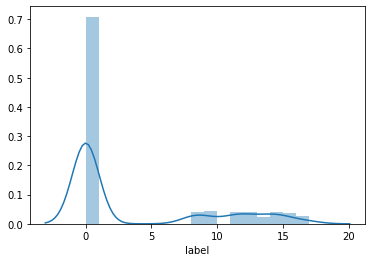

In [106]:
sns.distplot(y_test)

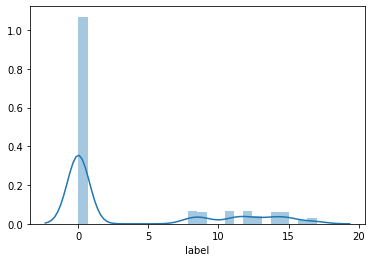

In [107]:
sns.distplot(y_train)

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
rf = RandomForestClassifier(max_depth=18, random_state=42)
rf.fit(X_train, y_train)

C:\Users\Andreas\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=18, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [109]:
rf.score(X_test, y_test)

0.9824256469679413

In [115]:
y_test_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)

In [111]:
f1_score(y_test, y_test_pred, average='weighted')

0.9823757711950108

In [112]:
classes

['OTHER',
 'SWEEPING',
 'VACUUMING',
 'DUSTING',
 'RUBBING',
 'DOWNSTAIRS',
 'WALKING',
 'WALKING_FAST',
 'UPSTAIRS_FAST',
 'UPSTAIRS']

In [113]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap="mako_r")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

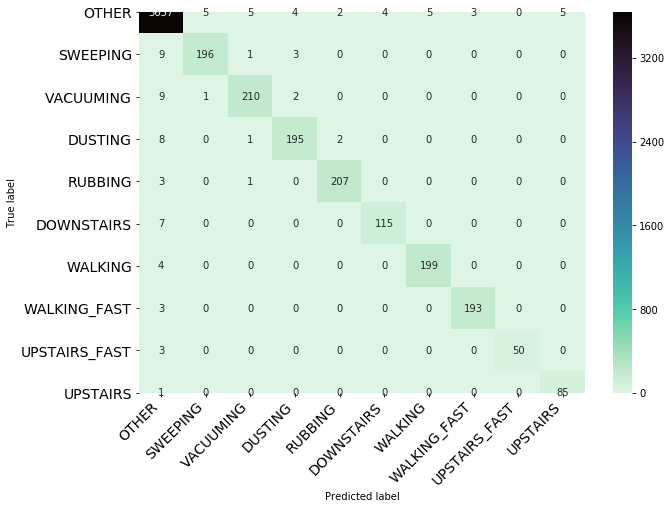

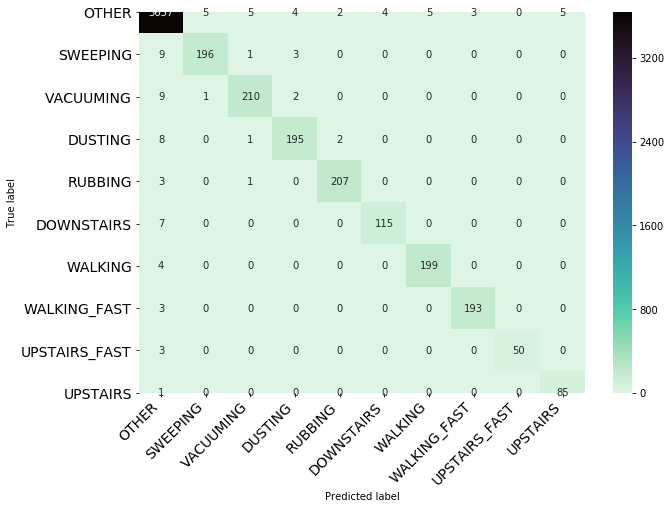

In [116]:
import matplotlib.pyplot as plt
print_confusion_matrix(cm, classes)